In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
indices = ['^GSPC', '^FTSE', '^GDAXI', '^N225', '000001.SS']
equities = ['AAPL', 'AMZN', 'MSFT', 'JNJ', 'KO']

In [3]:
start_date = "2010-01-01"
end_date = "2023-05-01"

# Load index data
index_data = yf.download(indices, start=start_date, end=end_date)['Adj Close']

# Load equity data
equity_data = yf.download(equities, start=start_date, end=end_date)['Adj Close']


[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


In [4]:
print(equity_data)

                  AAPL        AMZN         JNJ         KO        MSFT
Date                                                                 
2010-01-04    6.496294    6.695000   43.962334  18.936357   23.572371
2010-01-05    6.507526    6.734500   43.452553  18.707302   23.579987
2010-01-06    6.404015    6.612500   43.806000  18.700655   23.435278
2010-01-07    6.392177    6.500000   43.493347  18.654177   23.191555
2010-01-08    6.434673    6.676000   43.642891  18.308924   23.351496
...                ...         ...         ...        ...         ...
2023-04-24  165.101639  106.209999  163.679993  63.950001  281.155365
2023-04-25  163.543793  102.570000  165.179993  63.849998  274.819244
2023-04-26  163.533798  104.980003  162.619995  63.549999  294.725708
2023-04-27  168.177383  109.820000  163.000000  63.680000  304.165070
2023-04-28  169.445618  105.449997  163.699997  64.150002  306.589783

[3353 rows x 5 columns]


In [5]:
#Calculating daily returns
index_returns = index_data.pct_change()
equity_returns = equity_data.pct_change()
print(equity_returns)

                AAPL      AMZN       JNJ        KO      MSFT
Date                                                        
2010-01-04       NaN       NaN       NaN       NaN       NaN
2010-01-05  0.001729  0.005900 -0.011596 -0.012096  0.000323
2010-01-06 -0.015906 -0.018116  0.008134 -0.000355 -0.006137
2010-01-07 -0.001849 -0.017013 -0.007137 -0.002485 -0.010400
2010-01-08  0.006648  0.027077  0.003438 -0.018508  0.006897
...              ...       ...       ...       ...       ...
2023-04-24  0.001879 -0.007012  0.006085 -0.001561 -0.013963
2023-04-25 -0.009436 -0.034272  0.009164 -0.001564 -0.022536
2023-04-26 -0.000061  0.023496 -0.015498 -0.004699  0.072435
2023-04-27  0.028395  0.046104  0.002337  0.002046  0.032028
2023-04-28  0.007541 -0.039792  0.004294  0.007381  0.007972

[3353 rows x 5 columns]


In [6]:
#Calculating cumulative returns
index_cumulative_returns = (1 + index_returns).cumprod() - 1 
equity_cumulative_returns = (1 + equity_returns).cumprod() - 1
print(equity_cumulative_returns)

                 AAPL       AMZN       JNJ        KO       MSFT
Date                                                           
2010-01-04        NaN        NaN       NaN       NaN        NaN
2010-01-05   0.001729   0.005900 -0.011596 -0.012096   0.000323
2010-01-06  -0.014205  -0.012323 -0.003556 -0.012447  -0.005816
2010-01-07  -0.016027  -0.029126 -0.010668 -0.014902  -0.016155
2010-01-08  -0.009486  -0.002838 -0.007266 -0.033134  -0.009370
...               ...        ...       ...       ...        ...
2023-04-24  24.414742  14.864077  2.723187  2.377101  10.927327
2023-04-25  24.174937  14.320388  2.757307  2.371821  10.658532
2023-04-26  24.173399  14.680359  2.699076  2.355978  11.503015
2023-04-27  24.888204  15.403286  2.707719  2.362843  11.903457
2023-04-28  25.083428  14.750559  2.723642  2.387663  12.006320

[3353 rows x 5 columns]


In [7]:
def compute_drawdown(data):
    cumulative_returns = (1 + data).cumprod()  # Calculate cumulative returns
    peak = cumulative_returns.expanding().max()  # Calculate the running maximum of cumulative returns
    drawdown = (cumulative_returns - peak) / peak  # Calculate drawdown
    max_drawdown = drawdown.min()  # Get the minimum (maximum negative) drawdown
    return max_drawdown

index_max_drawdowns = compute_drawdown(index_returns)
equity_max_drawdowns = compute_drawdown(equity_returns)

print(-equity_max_drawdowns*100)  # in percentage

AAPL    43.797166
AMZN    56.145263
JNJ     27.366260
KO      36.987521
MSFT    37.148480
dtype: float64


In [8]:
#These RFRs were taken from 10 year Government Bond Yield on https://tradingeconomics.com
risk_free_rates = {
    '^GSPC': 0.0353,   # U.S. Treasury Yield
    '^FTSE': 0.036680,  # UK Government Bond Yield
    '^GDAXI': 0.0304,  # German Government Bond Yield
    '^N225': 0.006,  # Japanese Government Bond Yield
    '000001.SS': 0.027780,  # Chinese Government Bond Yield
    'AAPL': 0.0353,   # U.S. Treasury Yield
    'AMZN': 0.0353,   # U.S. Treasury Yield
    'MSFT': 0.0353,   # U.S. Treasury Yield
    'JNJ': 0.0353,   # U.S. Treasury Yield
    'KO': 0.0353,   # U.S. Treasury Yield
}

In [12]:
#Calculate sharpe ratio
index_sharpe_ratios = {}
equity_sharpe_ratios = {}
equity_sortino_ratios = {}
index_sortino_ratios ={}


# Compute annualized average returns
index_annual_returns = index_returns.mean() * 252
equity_annual_returns = equity_returns.mean() * 252
# Compute annualized standard deviation
index_annual_std_dev = index_returns.std() * np.sqrt(252)
equity_annual_std_dev = equity_returns.std() * np.sqrt(252)

index_downside_returns = index_returns[index_returns < 0]
index_downside_std_dev = index_downside_returns.std() * np.sqrt(252)

equity_downside_returns = equity_returns[equity_returns < 0]
equity_downside_std_dev = equity_downside_returns.std() * np.sqrt(252)
# Compute Sharpe Ratio and Sortino Ratio for each equity

for index in indices:
    index_sharpe_ratio = (index_annual_returns[index] - risk_free_rates[index]) / index_annual_std_dev[index]
    index_sharpe_ratios[index] = index_sharpe_ratio
    
    
    index_sortino_ratio = (index_annual_returns[index] - risk_free_rates[index]) / index_downside_std_dev[index]
    index_sortino_ratios[index] = index_sortino_ratio


# Compute Sharpe Ratio and Sortino Ratio for each equity


for equity in equities:
    equity_sharpe_ratio = (equity_annual_returns[equity] - risk_free_rates[equity]) / equity_annual_std_dev[equity]
    equity_sharpe_ratios[equity] = equity_sharpe_ratio
    
    
    equity_sortino_ratio = (equity_annual_returns[equity] - risk_free_rates[equity]) / equity_downside_std_dev[equity]
    equity_sortino_ratios[equity] = equity_sortino_ratio


In [10]:
# Convert standard deviations, cumulative returns, max drawdowns, Sharpe ratios, and Sortino ratios to lists
index_std_dev_list = index_annual_std_dev.values.tolist()
index_cumulative_returns_list = index_cumulative_returns.iloc[-1].values.tolist()
equity_std_dev_list = equity_annual_std_dev.values.tolist()
equity_cumulative_returns_list = equity_cumulative_returns.iloc[-1].values.tolist()
index_max_drawdowns_list = index_max_drawdowns.values.tolist()
equity_max_drawdowns_list = equity_max_drawdowns.values.tolist()
index_sharpe_ratios_list = list(index_sharpe_ratios.values())
equity_sharpe_ratios_list = list(equity_sharpe_ratios.values())
index_sortino_ratios_list = [index_sortino_ratios.get(index, '') for index in indices]
equity_sortino_ratios_list = [equity_sortino_ratios.get(equity, '') for equity in equities]

# Create table headers
headers = ["Index/Equity", "Standard Deviation", "Total Cumulative Return", "Max Drawdown", "Sharpe Ratio", "Sortino Ratio"]

# Combine the data into rows
index_rows = list(zip(indices, index_std_dev_list, index_cumulative_returns_list, index_max_drawdowns_list, index_sharpe_ratios_list, index_sortino_ratios_list))
equity_rows = list(zip(equities, equity_std_dev_list, equity_cumulative_returns_list, equity_max_drawdowns_list, equity_sharpe_ratios_list, equity_sortino_ratios_list))

# Print the tables
print("Index Metrics:")
print(tabulate(index_rows, headers=headers))
print("\nEquity Metrics:")
print(tabulate(equity_rows, headers=headers))


Index Metrics:
Index/Equity      Standard Deviation    Total Cumulative Return    Max Drawdown    Sharpe Ratio    Sortino Ratio
--------------  --------------------  -------------------------  --------------  --------------  ---------------
^GSPC                       0.198477                  0.0245117       -0.522997       0.428024         0.515329
^FTSE                       0.160058                  0.43094         -0.366055       0.0139228        0.01771
^GDAXI                      0.200038                  1.63254         -0.387794       0.300176         0.388531
^N225                       0.174666                  2.68007         -0.33925        0.430266         0.569219
000001.SS                   0.201934                  1.70831         -0.317989      -0.0311873       -0.0371381

Equity Metrics:
Index/Equity      Standard Deviation    Total Cumulative Return    Max Drawdown    Sharpe Ratio    Sortino Ratio
--------------  --------------------  -------------------------  ----

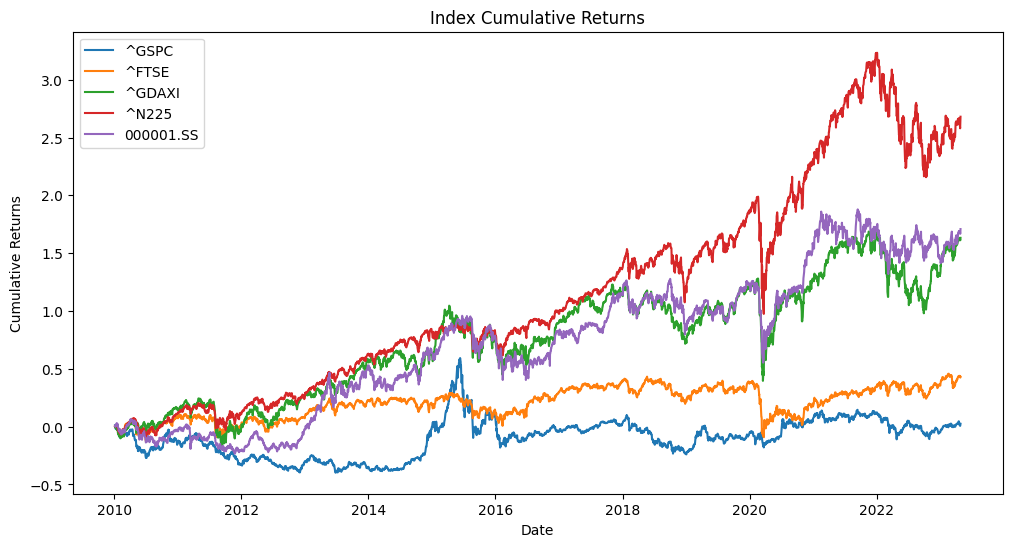

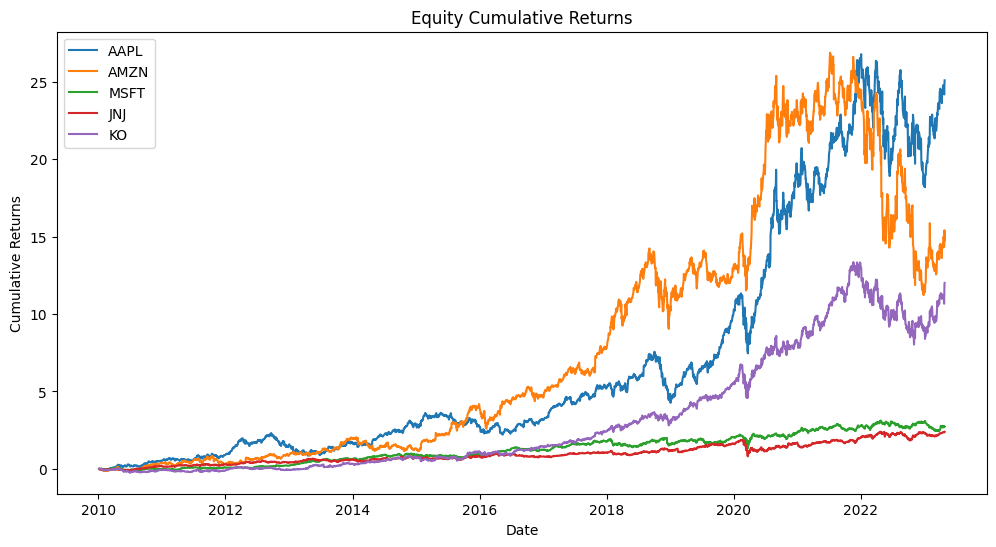

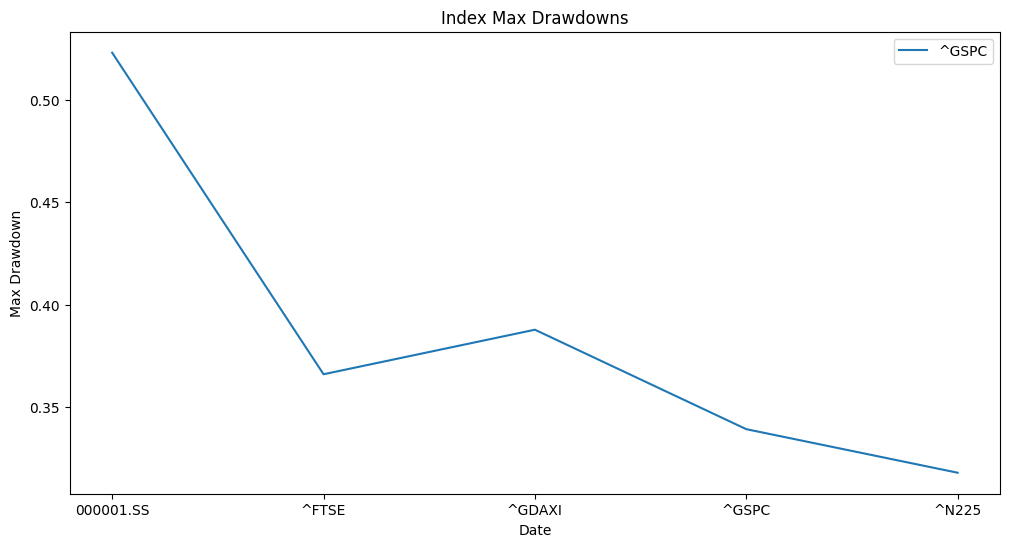

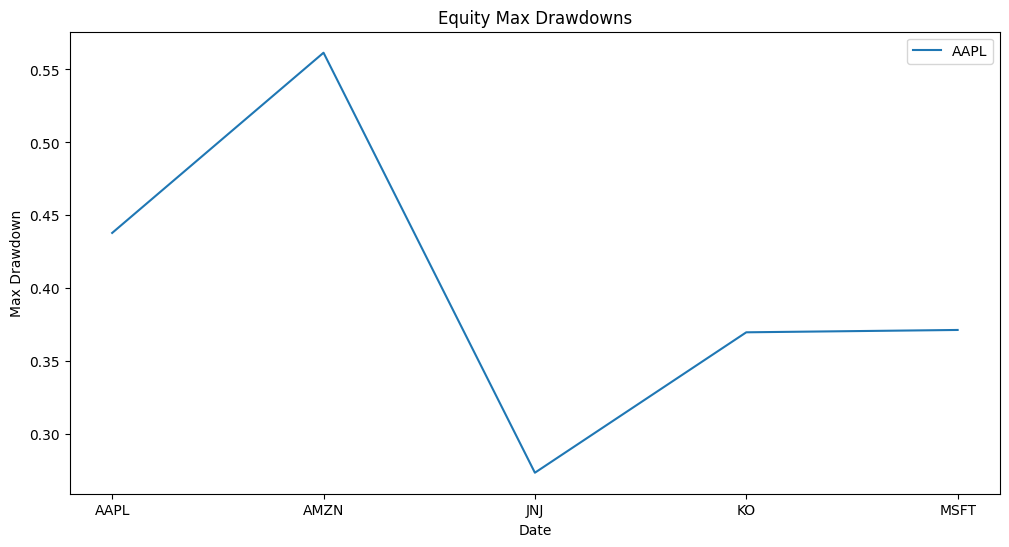

In [11]:
# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(index_cumulative_returns.index, index_cumulative_returns)
plt.title("Index Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend(indices)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(equity_cumulative_returns.index, equity_cumulative_returns)
plt.title("Equity Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend(equities)
plt.show()

# Plot drawdowns
plt.figure(figsize=(12, 6))
plt.plot(index_max_drawdowns.index, -index_max_drawdowns)
plt.title("Index Max Drawdowns")
plt.xlabel("Date")
plt.ylabel("Max Drawdown")
plt.legend(indices)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(equity_max_drawdowns.index, -equity_max_drawdowns)
plt.title("Equity Max Drawdowns")
plt.xlabel("Date")
plt.ylabel("Max Drawdown")
plt.legend(equities)
plt.show()
